In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('TQQQ', start='2010-2-9')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000
2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800
2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600
2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400
2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400
...,...,...,...,...,...,...
2021-07-26,136.020004,137.570007,135.039993,137.130005,137.130005,21443700
2021-07-27,136.830002,136.830002,127.830002,132.649994,132.649994,44536200
2021-07-28,133.860001,135.860001,131.270004,134.100006,134.100006,35922300


In [4]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2010-02-11,0.813750,0.869792,0.811146,0.865104,0.862942,1728000,NaN,NaN
2010-02-12,0.841563,0.876146,0.836667,0.868646,0.866475,4300800,NaN,NaN
2010-02-16,0.889063,0.904375,0.875104,0.902292,0.900037,4809600,NaN,NaN
2010-02-17,0.914375,0.917813,0.900625,0.917604,0.915311,9590400,NaN,NaN
2010-02-18,0.916667,0.940521,0.911146,0.935000,0.932663,19430400,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-07-26,136.020004,137.570007,135.039993,137.130005,137.130005,21443700,128.089500,114.3014
2021-07-27,136.830002,136.830002,127.830002,132.649994,132.649994,44536200,128.638499,115.0350
2021-07-28,133.860001,135.860001,131.270004,134.100006,134.100006,35922300,129.191500,115.8300


In [6]:
df = df.dropna()

In [7]:
df = df[['Adj Close','MA20','MA50']]

In [8]:
df

,Adj Close,MA20,MA50
Date,,,
2010-04-23,1.328130,1.225373,1.098733
2010-04-26,1.318260,1.234096,1.107839
2010-04-27,1.236901,1.237966,1.115248
2010-04-28,1.239811,1.241374,1.122043
2010-04-29,1.303089,1.248736,1.129799
...,...,...,...
2021-07-26,137.130005,128.089500,114.301400
2021-07-27,132.649994,128.638499,115.035000
2021-07-28,134.100006,129.191500,115.830000


In [12]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)

In [13]:
Buy

[70,
 104,
 253,
 312,
 369,
 437,
 559,
 671,
 816,
 1029,
 1147,
 1212,
 1261,
 1324,
 1386,
 1482,
 1545,
 1568,
 1673,
 1827,
 1983,
 2033,
 2209,
 2313,
 2372,
 2524,
 2644,
 2763,
 2807]

In [14]:
Sell

[18,
 90,
 227,
 282,
 331,
 407,
 513,
 629,
 801,
 996,
 1126,
 1186,
 1254,
 1305,
 1343,
 1430,
 1524,
 1560,
 1647,
 1814,
 1977,
 1999,
 2133,
 2288,
 2345,
 2486,
 2628,
 2738,
 2791]

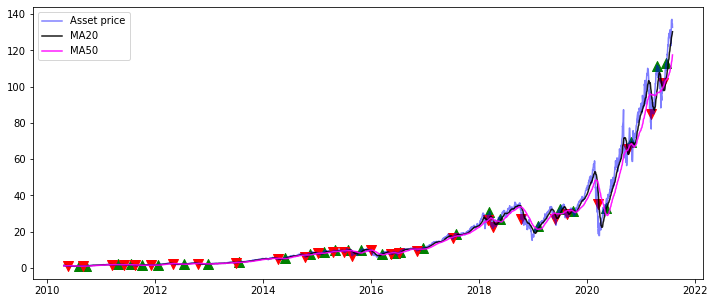

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close'], label='Asset price', c='blue', alpha=0.5)
plt.plot(df['MA20'], label='MA20', c='k', alpha=0.9)
plt.plot(df['MA50'], label='MA50', c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker='^', color='g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker='v', color='r', s=100)
plt.legend()
plt.show()